In [6]:
import torch
import numpy as np
x = torch.rand(5, 3)
print(x)

tensor([[0.0555, 0.2832, 0.6473],
        [0.4306, 0.6846, 0.1354],
        [0.3315, 0.4566, 0.1410],
        [0.2730, 0.5688, 0.3480],
        [0.3365, 0.5208, 0.5224]])


In [7]:
torch.cuda.is_available()

True

In [8]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [9]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.7192, 0.0958],
        [0.5225, 0.6190]]) 



In [10]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.0146, 0.8467, 0.7929],
        [0.7681, 0.5399, 0.4413]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [11]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [28]:
aidenTens = torch.ones(4, 4)

tensor[:,1] = 4
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print({tensor[:,1]})
print(f"Last column: {tensor[..., -1]}")
print(tensor)

First row: tensor([1., 4., 1., 1.])
First column: tensor([1., 1., 1., 1.])
{tensor([4., 4., 4., 4.])}
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 4., 1., 1.],
        [1., 4., 1., 1.],
        [1., 4., 1., 1.],
        [1., 4., 1., 1.]])


In [23]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 4., 1., 1., 1., 4., 1., 1., 1., 4., 1., 1.],
        [1., 4., 1., 1., 1., 4., 1., 1., 1., 4., 1., 1.],
        [1., 4., 1., 1., 1., 4., 1., 1., 1., 4., 1., 1.],
        [1., 4., 1., 1., 1., 4., 1., 1., 1., 4., 1., 1.]])


In [30]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
# ``tensor.T`` returns the transpose of a tensor
y1 = aidenTens @ aidenTens.T
print(aidenTens)
print(aidenTens.T)
print(y1)
y2 = aidenTens.matmul(aidenTens.T)

y3 = torch.rand_like(y1)
torch.matmul(aidenTens, aidenTens.T, out=y3)


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = aidenTens * aidenTens
z2 = aidenTens.mul(aidenTens)

z3 = torch.rand_like(aidenTens)
torch.mul(aidenTens, aidenTens, out=z3)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.],
        [4., 4., 4., 4.]])


tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [31]:
agg = aidenTens.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

16.0 <class 'float'>


In [32]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100.0%


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100.0%


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100.0%


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100.0%

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



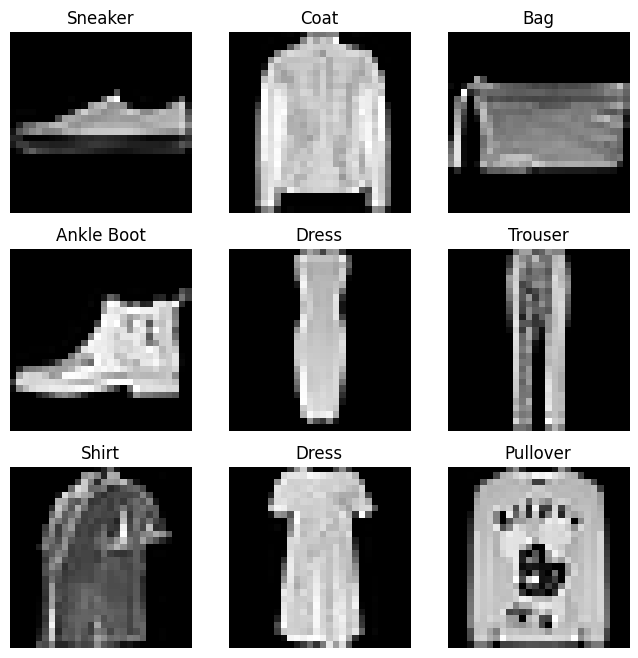

In [33]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()